# Enhancing Road Safety through Intelligent Systems
Multi-class, single-image classification

### Dataset
Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, the multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database


#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (7 Marks)
- Import all the required libraries
- Check for corrupted images or files (remove the corrupted images/files)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in training

# importing libs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import cv2
from PIL import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Loading Data set from g-Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = []
labels = []
classes = 15
cur_path = os.getcwd()
total_image = 0
corrupt_cnt = 0

# fetching images from g-dive

for i in range(classes):
  path = os.path.join('/content/drive/MyDrive/Train', str(i))
  print(path)
  images = os.listdir(path)

  #  checking for corrupted image

  for a in images:
    total_image += 1
    try:
      image = Image.open(path + '/' + a)
      image.close()
    except:
      corrupt_cnt += 1

print('Total images = ' + str(total_image) + ' || Corrupted Image = ' + str(corrupt_cnt))


/content/drive/MyDrive/Train/0
/content/drive/MyDrive/Train/1
/content/drive/MyDrive/Train/2
/content/drive/MyDrive/Train/3
/content/drive/MyDrive/Train/4
/content/drive/MyDrive/Train/5
/content/drive/MyDrive/Train/6
/content/drive/MyDrive/Train/7
/content/drive/MyDrive/Train/8
/content/drive/MyDrive/Train/9
/content/drive/MyDrive/Train/10
/content/drive/MyDrive/Train/11
/content/drive/MyDrive/Train/12
/content/drive/MyDrive/Train/13
/content/drive/MyDrive/Train/14
Total images = 23050 || Corrupted Image = 1


In [4]:

for i in range(classes):
  path = os.path.join('/content/drive/MyDrive/Train', str(i))
  print(path)
  images = os.listdir(path)

  #  image resize  & convering to np array

  for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print('Total images = ' + str(total_image) + ' || resized Image = ' + str(corrupt_cnt))


/content/drive/MyDrive/Train/0
/content/drive/MyDrive/Train/1
/content/drive/MyDrive/Train/2
/content/drive/MyDrive/Train/3
/content/drive/MyDrive/Train/4
/content/drive/MyDrive/Train/5
/content/drive/MyDrive/Train/6
/content/drive/MyDrive/Train/7
/content/drive/MyDrive/Train/8
/content/drive/MyDrive/Train/9
/content/drive/MyDrive/Train/10
Error loading image
/content/drive/MyDrive/Train/11
/content/drive/MyDrive/Train/12
/content/drive/MyDrive/Train/13
/content/drive/MyDrive/Train/14
Total images = 23050 || resized Image = 1


In [5]:
# Specify value for validation_split & get 75% data in training and 25% data in training

#lets chech data
print(data.shape)
print(labels.shape)

(23049, 32, 32, 3)
(23049,)


In [6]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state=42)
print('Train data set size' + str(X_train.shape) + str(y_train.shape))
print('Test data set size' + str(X_test.shape) + str(y_test.shape))


Train data set size(17286, 32, 32, 3)(17286,)
Test data set size(5763, 32, 32, 3)(5763,)


In [7]:
# converting labels into one hot encoding

y_train = to_categorical(y_train, 15)
y_test = to_categorical(y_test, 15)

### Get validation data from ImageDataGenerator (4 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [8]:
from keras.optimizers import Adam
from tensorflow import keras

batch_size = 8
learning_rate = 2e-05
classes = 15
epochs = 30


IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

### Define model (6 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(15, activation='softmax')
])

In [10]:
print(model.output_shape)

(None, 15)


### Compile the model (3 Marks)
- Specify optimizer, loss & metrics

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Get model summary (3 Marks)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       7

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
541/541 [==============================] - 14s 9ms/step - loss: 0.3596 - accuracy: 0.8951 - val_loss: 0.0919 - val_accuracy: 0.9703
Epoch 2/30
541/541 [==============================] - 4s 8ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0361 - val_accuracy: 0.9912
Epoch 3/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0264 - val_accuracy: 0.9925
Epoch 4/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.0199 - val_accuracy: 0.9936
Epoch 5/30
541/541 [==============================] - 5s 9ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0148 - val_accuracy: 0.9950
Epoch 6/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0342 - val_accuracy: 0.9896
Epoch 7/30
541/541 [==============================] - 4s 7ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0214 - val_accuracy: 0.9934
Epoch

### Draw plots (4 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

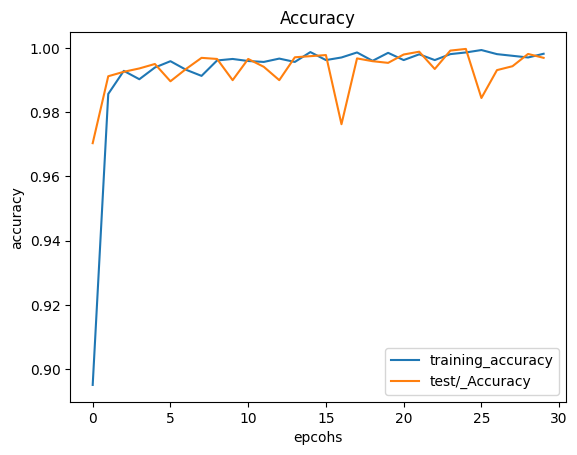

In [14]:
#Plot training accuracy and validation accuracy with respect to epochs

plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'test/_Accuracy')
plt.title('Accuracy')
plt.xlabel('epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

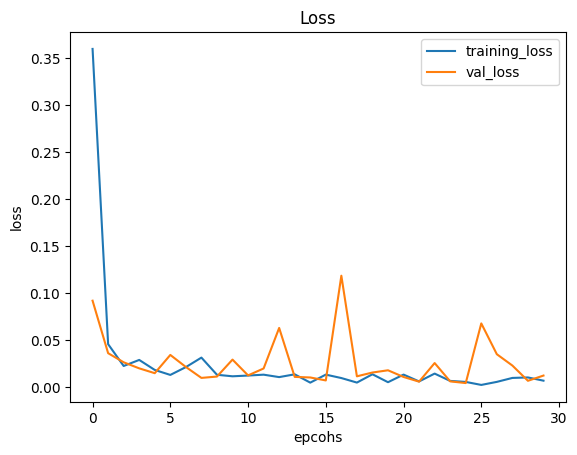

In [15]:
#Plot training loss and validation loss with respect to epochs

plt.figure(1)
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.xlabel('epcohs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Apply Transfer learning (8 Marks)
- Apply transfer learning using
- VGG16
- ResNet
- Check model performance for both

In [16]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
vgg_model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [17]:
for layer in vgg_model.layers:
  layer.trainable = False


In [18]:
new_model = Sequential()
new_model.add(vgg_model)
new_model.add(Flatten())
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(15, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                16416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 15)                255       
                                                                 
Total params: 14731887 (56.20 MB)
Trainable params: 17

In [19]:
print(f"Output shape of new_model: {new_model.output_shape}")

Output shape of new_model: (None, 15)


In [20]:
epochs = 25
batch_size = 32

history = new_model.fit(X_train, y_train, batch_size= batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/25
541/541 [==============================] - 10s 14ms/step - loss: 2.4874 - accuracy: 0.2886 - val_loss: 1.6589 - val_accuracy: 0.4288
Epoch 2/25
541/541 [==============================] - 7s 14ms/step - loss: 1.6317 - accuracy: 0.4383 - val_loss: 1.4287 - val_accuracy: 0.5124
Epoch 3/25
541/541 [==============================] - 6s 11ms/step - loss: 1.4610 - accuracy: 0.4991 - val_loss: 1.3188 - val_accuracy: 0.5572
Epoch 4/25
541/541 [==============================] - 6s 12ms/step - loss: 1.3587 - accuracy: 0.5345 - val_loss: 1.2355 - val_accuracy: 0.6028
Epoch 5/25
541/541 [==============================] - 6s 12ms/step - loss: 1.2657 - accuracy: 0.5634 - val_loss: 1.1140 - val_accuracy: 0.6183
Epoch 6/25
541/541 [==============================] - 7s 14ms/step - loss: 1.1796 - accuracy: 0.5810 - val_loss: 1.0539 - val_accuracy: 0.6393
Epoch 7/25
541/541 [==============================] - 7s 14ms/step - loss: 1.1206 - accuracy: 0.6029 - val_loss: 0.9998 - val_accuracy: 0.660

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50

res_model = Sequential()

res = ResNet50(include_top=False, weights='imagenet',input_shape = (32, 32, 3))

res_model.add(res)

# Add new layers
res_model.add(Flatten())
res_model.add(Dense(512, activation='relu'))
res_model.add(Dropout(0.5))
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.5))
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.3))
# Output layer
res_model.add(Dense(15, activation='softmax'))

res_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                       

In [22]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(lr=0.001, momentum=0.9)

res_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [23]:
res_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [24]:
res_history = res_model.fit(X_train, y_train, batch_size = 32, epochs= 25,
                            validation_data=(X_test,y_test))

Epoch 1/25
541/541 [==============================] - 45s 47ms/step - loss: 2.9639 - accuracy: 0.1041 - val_loss: 2.5301 - val_accuracy: 0.1336
Epoch 2/25
541/541 [==============================] - 24s 44ms/step - loss: 2.5295 - accuracy: 0.1338 - val_loss: 2.4451 - val_accuracy: 0.1551
Epoch 3/25
541/541 [==============================] - 23s 43ms/step - loss: 2.4699 - accuracy: 0.1475 - val_loss: 2.4238 - val_accuracy: 0.1477
Epoch 4/25
541/541 [==============================] - 23s 43ms/step - loss: 2.2654 - accuracy: 0.1889 - val_loss: 2.0454 - val_accuracy: 0.2794
Epoch 5/25
541/541 [==============================] - 24s 44ms/step - loss: 1.9393 - accuracy: 0.2723 - val_loss: 1.7948 - val_accuracy: 0.3351
Epoch 6/25
541/541 [==============================] - 22s 41ms/step - loss: 1.7008 - accuracy: 0.3129 - val_loss: 1.9151 - val_accuracy: 0.3085
Epoch 7/25
541/541 [==============================] - 23s 43ms/step - loss: 1.5402 - accuracy: 0.3568 - val_loss: 1.2180 - val_accuracy:

### Compare the performance of the models and conclude. (3 Marks)

In [25]:
# Model score commparisison

score1 = model.evaluate(X_test, y_test, verbose=0)
score2 = new_model.evaluate(X_test, y_test, verbose=0)
score3 = res_model.evaluate(X_test, y_test, verbose=0)

In [26]:
print("Model 1: Loss:", score1[0], "Accuracy:", score1[1])
print("Model 2: Loss:", score2[0], "Accuracy:", score2[1])
print("Model 3: Loss:", score3[0], "Accuracy:", score3[1])

Model 1: Loss: 0.012287464924156666 Accuracy: 0.99687659740448
Model 2: Loss: 0.7455752491950989 Accuracy: 0.7418011426925659
Model 3: Loss: 0.09483044594526291 Accuracy: 0.9760541319847107


# BEST Model ACCURACY WE GOT IS FROM MODEL-> 1 i.e. 99.68%